In [199]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_validate 
from sklearn.model_selection import cross_val_score
%matplotlib inline
plt.style.use('ggplot') 

sns.set(context='notebook', style='darkgrid', palette='deep', font='sans-serif')
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')
train_missvalue=train.copy()
test_missvalue=test.copy()
train_test_miss = pd.concat([train, test],sort=True)

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


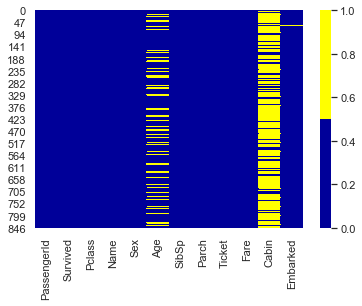

In [200]:
cols = train_missvalue.columns[:12] # Кол-во колонок
# определяем цвета 
# желтый - пропущенные данные, синий - не пропущенные
colours = ['#000099', '#ffff00'] 
sns.heatmap(train_missvalue[cols].isnull(), cmap=sns.color_palette(colours))
plt.show()

created missing indicator for: Age
created missing indicator for: Cabin
created missing indicator for: Embarked


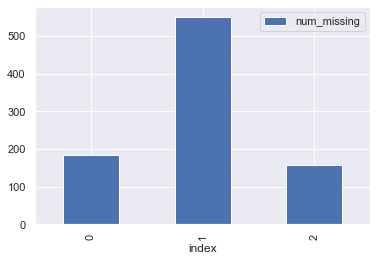

In [201]:
for col in train_missvalue.columns:
    missing = train_missvalue[col].isnull()
    num_missing = np.sum(missing)
    
    if num_missing > 0:  
        print('created missing indicator for: {}'.format(col))
        train_missvalue['{}_ismissing'.format(col)] = missing
# затем на основе индикатора строим гистограмму
ismissing_cols = [col for col in train_missvalue.columns if 'ismissing' in col]
train_missvalue['num_missing'] = train_missvalue[ismissing_cols].sum(axis=1)
train_missvalue['num_missing'].value_counts().reset_index().sort_values(by='index').plot.bar(x='index', y='num_missing')
plt.show()

created missing indicator for: Age
created missing indicator for: Fare
created missing indicator for: Cabin


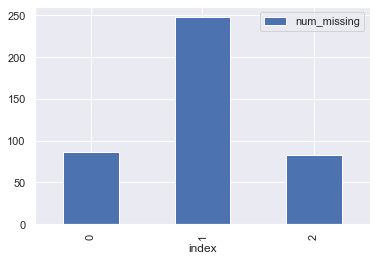

In [202]:
for col in test_missvalue.columns:
    missing = test_missvalue[col].isnull()
    num_missing = np.sum(missing)
    
    if num_missing > 0:  
        print('created missing indicator for: {}'.format(col))
        test_missvalue['{}_ismissing'.format(col)] = missing
# затем на основе индикатора строим гистограмму
ismissing_cols = [col for col in test_missvalue.columns if 'ismissing' in col]
test_missvalue['num_missing'] = test_missvalue[ismissing_cols].sum(axis=1)
test_missvalue['num_missing'].value_counts().reset_index().sort_values(by='index').plot.bar(x='index', y='num_missing')
plt.show()

In [203]:
train.nunique()


PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

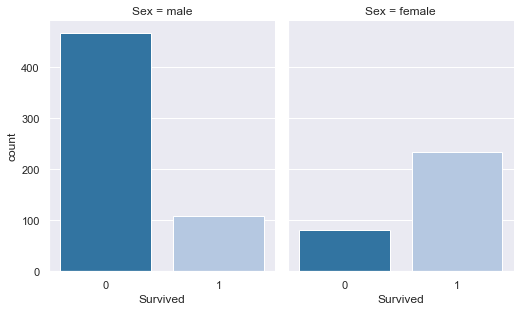

In [204]:
g = sns.catplot("Survived", col="Sex", col_wrap=2,
                data=train[train.Sex.notnull()],
                kind="count", height=4.5, aspect=.8, 
                palette='tab20')



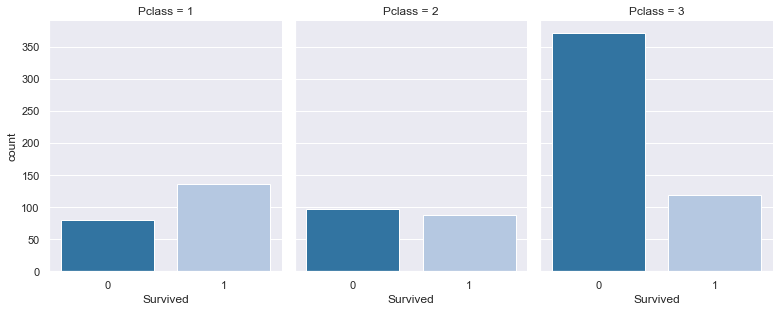

In [205]:
g = sns.catplot("Survived", col="Pclass", col_wrap=3,
                data=train[train.Pclass.notnull()],
                kind="count", height=4.5, aspect=.8, 
                palette='tab20')

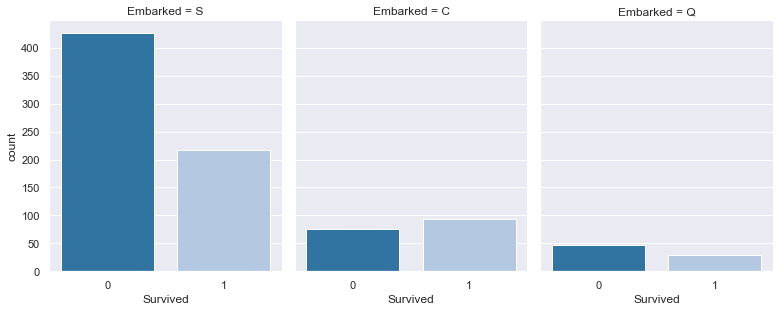

In [206]:
g = sns.catplot("Survived", col="Embarked", col_wrap=3,
                data=train[train.Embarked.notnull()],
                kind="count", height=4.5, aspect=.8, 
                palette='tab20')

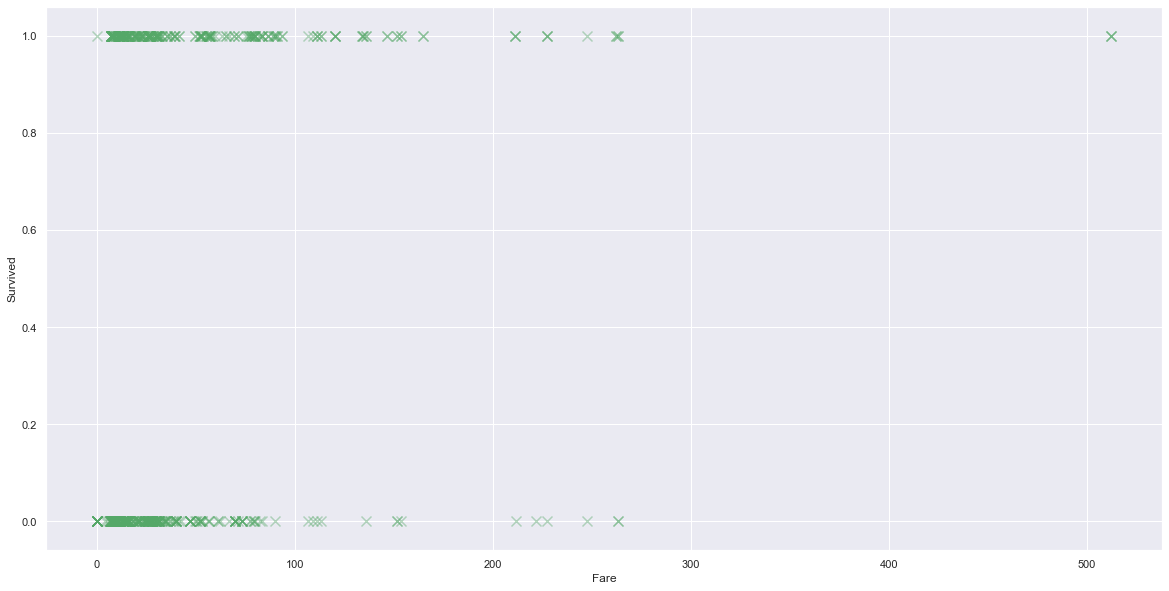

In [207]:
train.plot.scatter(x='Fare', y='Survived',alpha=0.4,color='g',s=100,marker='x',figsize=(20,10))
plt.show()


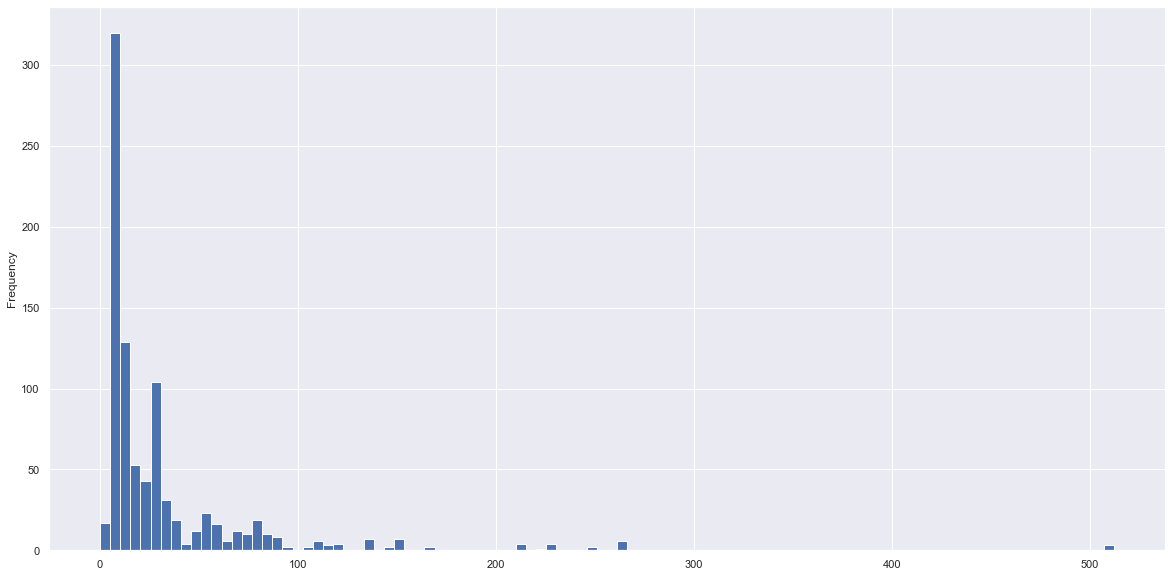

In [208]:
train.Fare.plot.hist(bins=100,figsize=(20,10))
plt.show()

In [209]:
train[train['Fare']>500]


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C


In [210]:
train_test_data = [train, test]


In [211]:

for dataset in train_test_data:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.')

In [212]:
pd.crosstab(train['Title'], train['Sex'])


Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [213]:
for dataset in train_test_data:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Other')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    
train[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Other,0.347826


In [214]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Other": 5}
for dataset in train_test_data:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

In [215]:
train.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


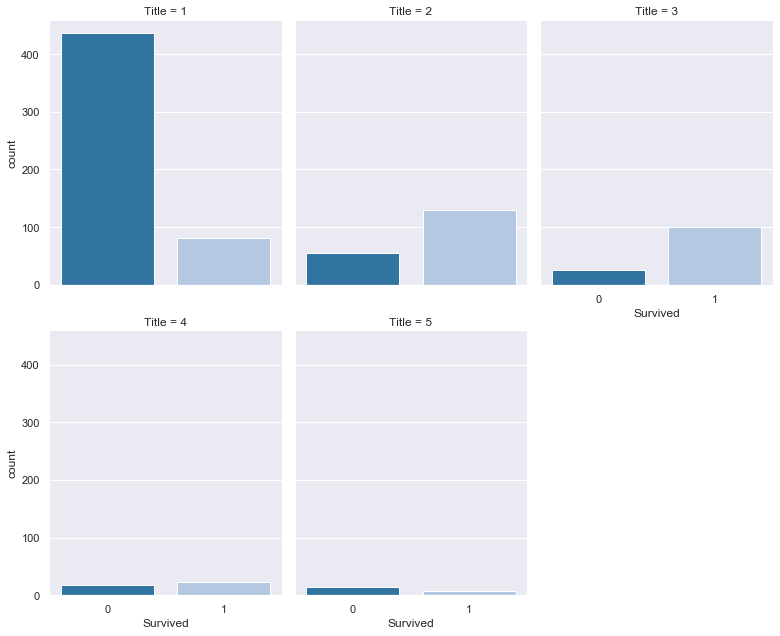

In [216]:
#"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Other": 5
g = sns.catplot("Survived", col="Title", col_wrap=3,
                data=train[train.Title.notnull()],
                kind="count", height=4.5, aspect=.8, 
                palette='tab20')

In [217]:
#меняем на категории
for dataset in train_test_data:
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

In [218]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,3
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,3
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S,1


In [219]:
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [220]:
for dataset in train_test_data:
    dataset['Embarked'] = dataset['Embarked'].fillna('S')


In [221]:
#меняем на категории
for dataset in train_test_data:
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0,'C': 1,'Q': 2 }).astype(int)

In [222]:
for dataset in train_test_data:
    age_avg = dataset['Age'].mean()
    age_std = dataset['Age'].std()
    age_null_count = dataset['Age'].isnull().sum()
    
    age_null_random_list = np.random.randint(age_avg - age_std, age_avg + age_std, size=age_null_count)
    
    dataset['Age'][np.isnan(dataset['Age'])] = age_null_random_list
    dataset['Age'] = dataset['Age'].astype(int)
    
train.head()

f:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22,1,0,A/5 21171,7.2500,NaN,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38,1,0,PC 17599,71.2833,C85,1,3
2,3,1,3,"Heikkinen, Miss. Laina",1,26,0,0,STON/O2. 3101282,7.9250,NaN,0,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35,1,0,113803,53.1000,C123,0,3
4,5,0,3,"Allen, Mr. William Henry",0,35,0,0,373450,8.0500,NaN,0,1


In [223]:
features_drop = ['Name', 'SibSp', 'Parch', 'Ticket', 'Cabin']
train = train.drop(features_drop, axis=1)
test = test.drop(features_drop, axis=1)
train = train.drop(['PassengerId'], axis=1)

In [224]:
med = test['Fare'].median()
print(med)
test['Fare'] = test['Fare'].fillna(med)


X_train = train.drop('Survived', axis=1)
y_train = train['Survived']

X_test = test.drop("PassengerId", axis=1).copy()

X_train.shape, y_train.shape, X_test.shape


14.4542


((891, 6), (891,), (418, 6))

In [225]:
train

,Survived,Pclass,Sex,Age,Fare,Embarked,Title
0,0,3,0,22,7.2500,0,1
1,1,1,1,38,71.2833,1,3
2,1,3,1,26,7.9250,0,2
3,1,1,1,35,53.1000,0,3
4,0,3,0,35,8.0500,0,1
...,...,...,...,...,...,...,...
886,0,2,0,27,13.0000,0,5
887,1,1,1,19,30.0000,0,2
888,0,3,1,23,23.4500,0,2
889,1,1,0,26,30.0000,1,1


In [226]:
 test

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title
0,892,3,0,34,7.8292,2,1
1,893,3,1,47,7.0000,0,3
2,894,2,0,62,9.6875,2,1
3,895,3,0,27,8.6625,0,1
4,896,3,1,22,12.2875,0,3
...,...,...,...,...,...,...,...
413,1305,3,0,19,8.0500,0,1
414,1306,1,1,39,108.9000,1,5
415,1307,3,0,38,7.2500,0,1
416,1308,3,0,34,8.0500,0,1


In [227]:
# train = train.astype({'Fare': int})
np.isnan(test).sum() 

PassengerId    0
Pclass         0
Sex            0
Age            0
Fare           0
Embarked       0
Title          0
dtype: int64

In [228]:
clf = DecisionTreeClassifier(max_depth=7)
clf.fit(X_train, y_train)
y_pred_decision_tree = clf.predict(X_test)
acc_decision_tree = round(clf.score(X_train, y_train) * 100, 2)
print (acc_decision_tree)

89.67


In [229]:
clf = GaussianNB()
clf.fit(X_train, y_train)
y_pred_gnb = clf.predict(X_test)
acc_gnb = round(clf.score(X_train, y_train) * 100, 2)
print (acc_gnb)

77.78
